In [1]:
import imports as ii
import functions as f
import preprocessing as pp
import neuralnetworks as nn 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test_masked.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


In [66]:
X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

# convert labels
sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)

In [67]:
############################################################## hack sampling
leng = 30000
start = 6666
X_train = X_train[start:start+leng]
y_train = y_train[start:start+leng]
#X_test = X_test[start:start+leng]
#y_test = y_test[start:start+leng]

# POS-tagger

In [12]:
'''# https://www.nltk.org/api/nltk.tag.html
from nltk import pos_tag, word_tokenize
nltk.download('averaged_perceptron_tagger')

#only works for english
def pos_tag_stringlist(strlist, shouldTokenize):
    pos_tagged_strlist = []
    if shouldTokenize: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(word_tokenize(str)))
    else: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(str))
    return pos_tagged_strlist'''

NameError: name 'nltk' is not defined

# Grid search

In [68]:
def grid_search(train_list, test_list, y_train, y_test):
    simp_contr = [0, 1]
    gram_cor = [0, 1]
    simp_neg = [0, 1]
    lemma = [0] # since the function is wrong - by Gergo
    rem_stop = [0, 1]
    basic_preprocessing = 1
    list_of_data = []
    for z in simp_contr:
        for x in gram_cor:
            for c in simp_neg:
                for v in lemma:
                    for b in rem_stop:
                        train = train_list
                        test = test_list
                        if z == 1: # contractions
                            train = f.simplify_contraction(train)
                            test = f.simplify_contraction(test)
                        if basic_preprocessing == 1: # basic preprocessing
                            train = pp.basic_preprocess(train)
                            test = pp.basic_preprocess(test)
                        if x == 1: # grammar correction 
                            train = pp.grammar_corrector(train)
                            test = pp.grammar_corrector(test)
                        if c == 1: # Simnplyfy Negotiation 
                            train = f.simplify_negation(train)
                            test = f.simplify_negation(test)
                        if v == 1: # Lemmatize 
                            train = pp.lemmatize_sentencelist(train)
                            test = pp.lemmatize_sentencelist(test)
                        if b == 1: # Remove stop words
                            train = pp.remove_stop_words(train)
                            test = pp.remove_stop_words(test)

                        list_of_data.append([[z, basic_preprocessing, x, c, v, b], train, test]) #
    return list_of_data, y_train, y_test

# Below line is running for a while

In [69]:
data_sets, y_train, y_test = grid_search(X_train, X_test, y_train, y_test)

## Training Final

Combinations:  [0, 1, 0, 0, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 120s 99ms/step - loss: 0.4049 - accuracy: 0.8293 - val_loss: 0.3134 - val_accuracy: 0.8765 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 121s 101ms/step - loss: 0.2447 - accuracy: 0.9122 - val_loss: 0.3254 - val_accuracy: 0.8748 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 122s 101ms/step - loss: 0.2387 - accuracy: 0.9229 - val_loss: 0.6455 - val_accuracy: 0.6488 - lr: 0.0010
Epoch 3: early stopping


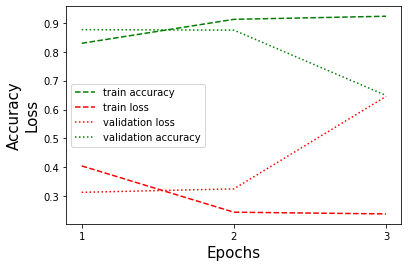

Combinations:  [0, 1, 0, 0, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 123s 101ms/step - loss: 0.4126 - accuracy: 0.8261 - val_loss: 0.3183 - val_accuracy: 0.8721 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 120s 100ms/step - loss: 0.2272 - accuracy: 0.9202 - val_loss: 0.3731 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 120s 100ms/step - loss: 0.1658 - accuracy: 0.9458 - val_loss: 0.4475 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 3: early stopping


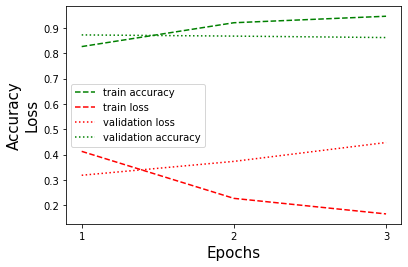

Combinations:  [0, 1, 0, 1, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 111s 91ms/step - loss: 0.4207 - accuracy: 0.8251 - val_loss: 0.3052 - val_accuracy: 0.8777 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 107s 89ms/step - loss: 0.2662 - accuracy: 0.9113 - val_loss: 0.3484 - val_accuracy: 0.8713 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 108s 90ms/step - loss: 0.2023 - accuracy: 0.9339 - val_loss: 0.3408 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 3: early stopping


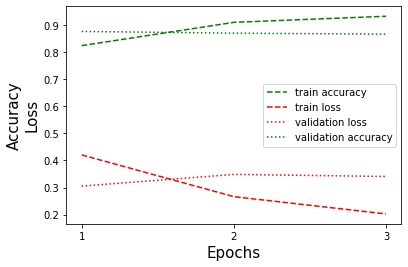

Combinations:  [0, 1, 0, 1, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 109s 90ms/step - loss: 0.4459 - accuracy: 0.8153 - val_loss: 0.3165 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 108s 90ms/step - loss: 0.2590 - accuracy: 0.9099 - val_loss: 0.3636 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2390 - accuracy: 0.9323
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 108s 90ms/step - loss: 0.2390 - accuracy: 0.9323 - val_loss: 1.0768 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 3: early stopping


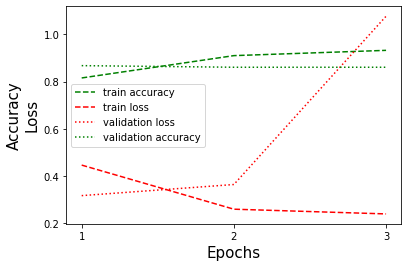

Combinations:  [0, 1, 1, 0, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 97s 80ms/step - loss: 0.4669 - accuracy: 0.8002 - val_loss: 0.3390 - val_accuracy: 0.8618 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 96s 80ms/step - loss: 0.2807 - accuracy: 0.8935 - val_loss: 0.3871 - val_accuracy: 0.8617 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 96s 80ms/step - loss: 0.4874 - accuracy: 0.8150 - val_loss: 0.6366 - val_accuracy: 0.6359 - lr: 0.0010
Epoch 3: early stopping


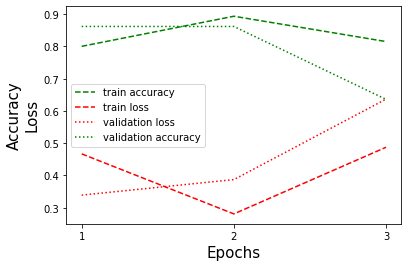

Combinations:  [0, 1, 1, 0, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 107s 88ms/step - loss: 0.4225 - accuracy: 0.8182 - val_loss: 0.3616 - val_accuracy: 0.8580 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 106s 89ms/step - loss: 0.2899 - accuracy: 0.8944 - val_loss: 0.3820 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9270
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 114s 95ms/step - loss: 0.2209 - accuracy: 0.9270 - val_loss: 0.3888 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 3: early stopping


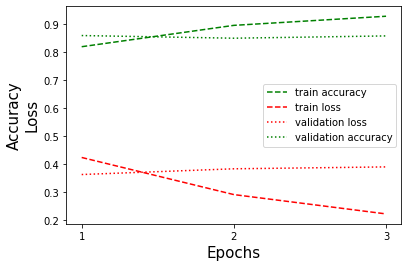

Combinations:  [0, 1, 1, 1, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 109s 89ms/step - loss: 0.4247 - accuracy: 0.8159 - val_loss: 0.3382 - val_accuracy: 0.8694 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2651 - accuracy: 0.9031
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 106s 89ms/step - loss: 0.2651 - accuracy: 0.9031 - val_loss: 0.3572 - val_accuracy: 0.8696 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.9413
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 107s 89ms/step - loss: 0.1692 - accuracy: 0.9413 - val_loss: 0.4055 - val_accuracy: 0.8720 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1404 - accuracy: 0.9545
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.0

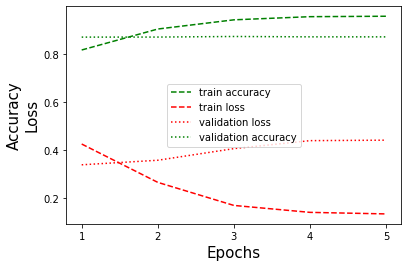

Combinations:  [0, 1, 1, 1, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 112s 92ms/step - loss: 0.4812 - accuracy: 0.8063 - val_loss: 0.3497 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.9038
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 109s 91ms/step - loss: 0.2641 - accuracy: 0.9038 - val_loss: 0.3540 - val_accuracy: 0.8572 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 108s 90ms/step - loss: 0.1711 - accuracy: 0.9431 - val_loss: 0.3606 - val_accuracy: 0.8518 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9513
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 107s 89ms/step - loss: 0.1499 - accuracy: 0.9513 - val_loss: 0.4405 - val_accuracy: 0.8555 - lr: 2

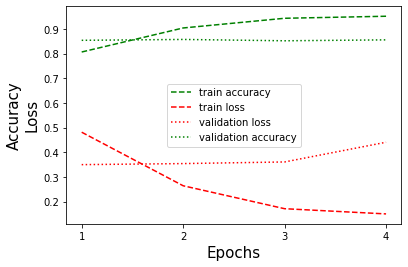

Combinations:  [1, 1, 0, 0, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 123s 101ms/step - loss: 0.4100 - accuracy: 0.8282 - val_loss: 0.3370 - val_accuracy: 0.8656 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2519 - accuracy: 0.9108
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 128s 107ms/step - loss: 0.2519 - accuracy: 0.9108 - val_loss: 0.3228 - val_accuracy: 0.8719 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1659 - accuracy: 0.9486
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 128s 107ms/step - loss: 0.1659 - accuracy: 0.9486 - val_loss: 0.3732 - val_accuracy: 0.8759 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1343 - accuracy: 0.9586
Epoch 4: ReduceLROnPlateau reducing learning rate to 

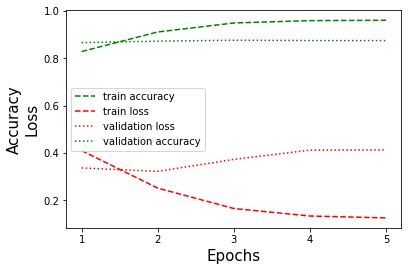

Combinations:  [1, 1, 0, 0, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 129s 106ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 120s 100ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 118s 98ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


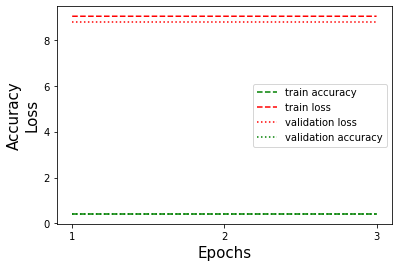

Combinations:  [1, 1, 0, 1, 0, 0]
Epoch 1/10
1200/1200 [==============================] - 135s 111ms/step - loss: 0.3990 - accuracy: 0.8314 - val_loss: 0.3632 - val_accuracy: 0.8522 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2923 - accuracy: 0.8991
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 133s 111ms/step - loss: 0.2923 - accuracy: 0.8991 - val_loss: 0.5462 - val_accuracy: 0.8606 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 132s 110ms/step - loss: 0.3421 - accuracy: 0.8282 - val_loss: 0.4898 - val_accuracy: 0.7310 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2782 - accuracy: 0.8766
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 131s 109ms/step - loss: 0.2782 - accuracy: 0.8766 - val_loss: 0.4529 - val_accuracy: 0.8242 - l

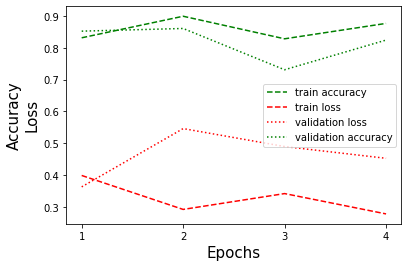

Combinations:  [1, 1, 0, 1, 0, 1]
Epoch 1/10
1200/1200 [==============================] - 133s 110ms/step - loss: 0.4213 - accuracy: 0.8176 - val_loss: 0.3570 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 135s 112ms/step - loss: 0.2553 - accuracy: 0.9116 - val_loss: 0.4006 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 3/10
 214/1200 [====>.........................] - ETA: 1:52 - loss: 0.4099 - accuracy: 0.8187

In [ ]:
### INIT RESULTS
results, time = f.init_log_for_training()
# Sentencies max length:

max_len = 40 # maximum length of sentencies
early_stop_patience = 2 # its 2 FOR NORMAL CASE
batch_size = 25 # bigger = faster train but super unaccurate, lower = slower. Its usually 50

for data_set in data_sets:
    # Tokenizer
    labels = data_set[0]
    # check whenever combination is already checked. Working only with RNN!:
    print("Combinations: ", labels)

    tokenizer = pp.tokenizer_init(data_set[1], data_set[2])
    Train = tokenizer.texts_to_sequences(data_set[1])
    Test = tokenizer.texts_to_sequences(data_set[2])
        # Sequencer 
    X_train_p = pp.sequence_pad(Train, maxlen=max_len) # there are several attributes which can be defined, basic = first 50 words 
    X_test_p = pp.sequence_pad(Test,maxlen=max_len)
        
        # TRAIN
    #print("shapes: ", X_train_p.shape, X_test_p.shape)
    history, model = nn.RNN_train(X_train_p, y_train, X_test_p, y_test, tokenizer, 
                                  maxlen=max_len, early_stop_patience=early_stop_patience, batch_size=batch_size)
    ### LOGGING INIT - RNN
    # GET the index of the highest test ACCURACY where the RNN model stopped to TRAIN
    max_value = max(history.history['val_accuracy'])
    max_index = history.history['val_accuracy'].index(max_value)
    # How many percent of the sentencies were catched full
    ratio_train, ratio_test = f.lengths_catch(data_set[1], data_set[2], length_of_sentence=max_len)
    
    new_row = {'Running ID':time, 
           "Model Name":"RNN", 
          "Expand Contractions":labels[0],
          "Basic Preprocessing":labels[1],
          "Grammar Correction":labels[2],
           "Simplify Negotiations": labels[3],
          "Lemmatize": labels[4],
          "Remove Stop Words": labels[5],
          "No. of Sentences": len(data_set[1]),
          "Train Accuracy STOP": history.history['accuracy'][max_index],
          "Test Accuracy STOP": history.history['val_accuracy'][max_index],
          "Train Loss STOP": history.history['loss'][max_index],
          "Test Loss STOP": history.history['val_loss'][max_index],
              "Train_sentence_fully_catched_ratio": ratio_train,
               "Test_sentence_fully_catched_ratio": ratio_test,
               "Length of Sentence":max_len,
              "Batch size of RNN":batch_size}
    
    results = results.append(new_row, ignore_index=True)
    # maybe we dont need it in every round but how knows
    try:
        results.to_csv("results/results_"+time+".csv")
    except: 
        continue
    f.plot_model_history(history)    
    # CLEAN
    del labels
    del tokenizer
    del Train
    del Test
    del X_train_p
    del X_test_p
    del history
    del model 
    
# save results again
print("Combinations were checked")
results.to_csv("results/results_"+time+".csv") 

# Leave it in here for experimenting purpose: 

In [248]:
'''### INIT RESULTS
results, time = f.init_log_for_training()
for c in range(2):
    # Tokenizer
    labels = data_sets[c][0]
    print("##### Combination\n: ", data_sets[c][0])
    tokenizer = pp.tokenizer_init(data_sets[c][1], data_sets[c][2])
    Train = tokenizer.texts_to_sequences(data_sets[c][1])
    Test = tokenizer.texts_to_sequences(data_sets[c][2])
        # Sequencer 
    X_train_p = pp.sequence_pad(Train) # there are several attributes which can be defined, basic = first 50 words 
    X_test_p = pp.sequence_pad(Test)
        
    # TRAIN RNN
    history, model = nn.RNN_train(X_train_p, y_train, X_test_p, y_test, tokenizer)

    ### LOGGING INIT - RNN
    # GET the index of the highest test ACCURACY where the RNN model stopped to TRAIN
    max_value = max(history.history['val_accuracy'])
    max_index = history.history['val_accuracy'].index(max_value)
    # append
    
    new_row = {'Running ID':save_time, 
           "Model Name":"RNN", 
          "Expand Contractions":labels[0],
          "Basic Preprocessing":labels[1],
          "Grammar Correction":labels[2],
           "Simplify Negotiations": labels[3],
          "Lemmatize": labels[4],
          "Remove Stop Words": labels[5],
          "No. of Sentences": len(data_sets[c][1]),
          "Train Accuracy STOP": history.history['accuracy'][max_index],
          "Test Accuracy STOP": history.history['val_accuracy'][max_index],
          "Train Loss STOP": history.history['loss'][max_index],
          "Test Loss STOP": history.history['val_loss'][max_index]}
    
    results = results.append(new_row, ignore_index=True)
    
# save results
results.to_csv("results/results_"+time+".csv") '''

##### Combination
:  [0, 1, 0, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 5s 175ms/step - loss: 1.2002 - accuracy: 0.5320 - val_loss: 0.6855 - val_accuracy: 0.5870 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6491 - accuracy: 0.5910
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 3s 149ms/step - loss: 0.6491 - accuracy: 0.5910 - val_loss: 0.6657 - val_accuracy: 0.6240 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6129 - accuracy: 0.7610
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 3s 149ms/step - loss: 0.6129 - accuracy: 0.7610 - val_loss: 0.6637 - val_accuracy: 0.6260 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.6038 - accuracy: 0.7640
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
2